# **V6 on Complete Datatest**

In [1]:
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from utils.wrapper import YOLOAPIWrappper
from utils.pipeline import CPPipeline

### **Additive**

In [2]:
v6 = "../utils/v6/bestv6.onnx"
yolov6_detector = YOLOAPIWrappper(v6,file_path='../calibration/calibv6_all_test_a.pickle', conf_thres=0.7, iou_thres=0.5)
pipev6 = CPPipeline(yolov6_detector, test_set='test', method='additive')

In [4]:
X_train, y_train, labels_train= pipev6.extract_yolo_dataset()
X_train, X_val, y_train, y_val, labels_train, labels_val = pipev6.calibration_and_val(X_train, y_train, labels_train)
conformal_predictor= pipev6.pipeline( X_train=X_train, y_train= y_train, labels_train= labels_train)

Predictions: [[1228.67211914 1400.33520508 1279.97216797 1464.41381836]
 [1447.62341309 1057.62963867 1640.74133301 1131.70825195]
 [1529.84985352 1209.61474609 1707.33520508 1396.5847168 ]
 ...
 [ 871.67877197 1024.9050293   939.8135376  1067.05859375]
 [1466.71081543 1103.89147949 1593.82556152 1250.55822754]
 [1266.87561035 1106.28674316 1389.25109863 1198.15393066]]
Matched Ground Truths: [[1229. 1398. 1278. 1467.]
 [1443. 1056. 1638. 1132.]
 [1529. 1209. 1709. 1404.]
 ...
 [ 871. 1021.  942. 1069.]
 [1464. 1104. 1591. 1246.]
 [1271. 1106. 1379. 1198.]]
Images: ['/home/aws_install/data/yolo_database/images/test/OMAD_13_35_03.jpeg', '/home/aws_install/data/yolo_database/images/test/mg7v0EMfJ74_ZBAA47.png', '/home/aws_install/data/yolo_database/images/test/UbPJcYKDwpM_LSZH49.png', '/home/aws_install/data/yolo_database/images/test/LICJ_20_35_05.jpeg', '/home/aws_install/data/yolo_database/images/test/LICJ_25_35_11.jpeg', '/home/aws_install/data/yolo_database/images/test/SAEZ_17_35_22.

Marginal coverage: 1.0
Average area: 62880.3984375


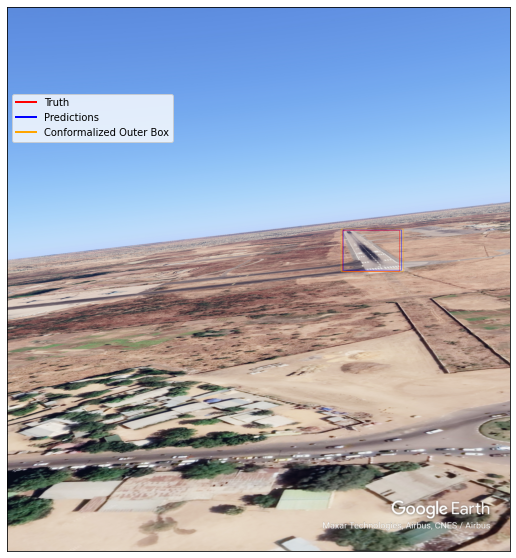

In [5]:
pipev6.infer_eval_single_image(
    conformal_predictor, 
    X_val[5],  # Image path at index 5
    y_val[5],  # Ground truth bounding boxes at index 5
    labels_val[5],  # Labels at index 5
    None  
)

In [6]:
y_pred_val, y_true_val, images_val, classes_val, box_inner_val, box_outer_val = pipev6.infer_all_images(conformal_predictor,X_val, y_val, labels_val, visualize = False)

Number of images: 463
Number of images without predictions: 18
Number of images with predictions: 445


In [7]:
average_glo_area, cover = pipev6.average_cover_and_area(y_pred_val, y_true_val, box_outer_val)

Average area of prediction intervals: 60153.734375
Average length of prediction intervals: 245.26258850097656
Average Marginal coverage: 0.7573033707865169
